In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [8]:
maxatac_test = "/Users/caz3so/scratch/20220915_maxatac_reviews/Leopard/benchmark/CTCF_binary_revcomp99_RR_0_benchmark_chr1_200bp_PRC.tsv"
leopard_test = "/Users/caz3so/scratch/20220915_maxatac_reviews/Leopard/benchmark/OMNI_50K_quantNorm_CTCF_hg19_200bp_chr1_200bp_PRC.tsv"

In [14]:
def import_AUPR(input_fn):
    df = pd.read_table(input_fn, sep="\t")
    return df

In [15]:
df_max = import_AUPR(maxatac_test)
df_leopard = import_AUPR(leopard_test)

In [52]:
def plot_PR(df_max, df_leopard, tf, output_dir, output_filename):
    plt.figure(figsize=(4,4), dpi=100)

    plt.scatter(x=df_max["Recall"], y=df_max["Precision"], zorder=9, c="#d6604d", s=10)
    plt.scatter(x=df_leopard["Recall"], y=df_leopard["Precision"], zorder=10, c="#878787", s=10)

    plt.grid(zorder=0)

    plt.title(f"{tf}")

    plt.ylabel("Precision")
    plt.xlabel("Recall")

    plt.ylim(0,1)
    plt.xlim(0,1)

    plt.legend(["maxATAC", "Leopard"])
    
    plt.savefig(os.path.join(output_dir, output_filename))

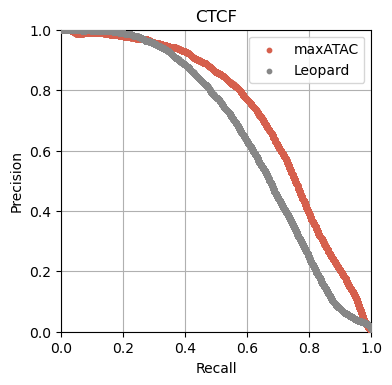

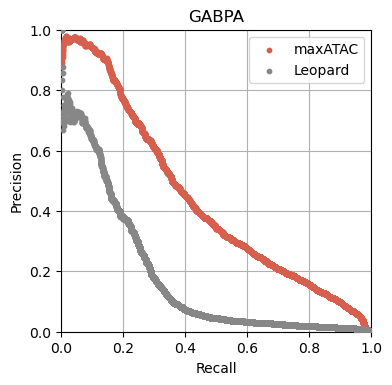

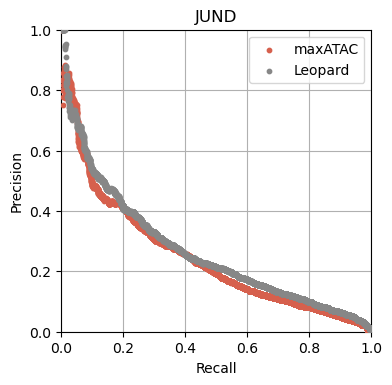

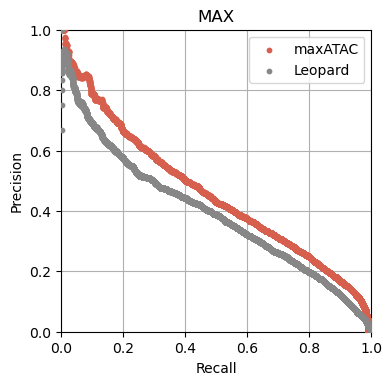

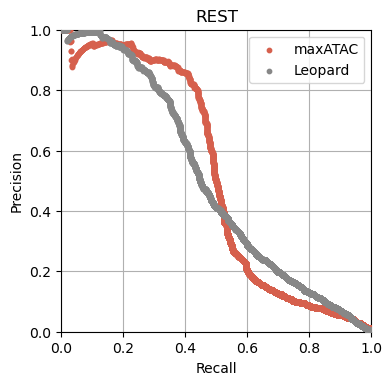

In [59]:
aupr_df = []

for TF in ["CTCF", "GABPA", "JUND", "MAX", "REST"]:
        maxatac_test = f"/Users/caz3so/scratch/20220915_maxatac_reviews/Leopard/benchmark/{TF}_binary_revcomp99_RR_0_benchmark_chr1_200bp_PRC.tsv"
        leopard_test = f"/Users/caz3so/scratch/20220915_maxatac_reviews/Leopard/benchmark/OMNI_50K_quantNorm_{TF}_hg19_200bp_chr1_200bp_PRC.tsv"
        
        df_max = import_AUPR(maxatac_test)
        df_leopard = import_AUPR(leopard_test)
        
        df_max_aupr = df_max["AUPRC"].unique()[0]
        df_leopard_aupr = df_leopard["AUPRC"].unique()[0]
        
        aupr_df.append([TF, df_max_aupr, df_leopard_aupr])
        
        plot_PR(df_max, 
                df_leopard, 
                TF, 
                "/Users/caz3so/scratch/20220915_maxatac_reviews/Leopard/benchmark", 
                f"OMNI_50K_maxatac_leopard_{TF}_comparison_w200_s200_PRcurve.jpeg")

In [62]:
aupr_df = pd.DataFrame(aupr_df, columns=["TF", "maxATAC", "Leopard"])

In [63]:
aupr_df

,TF,maxATAC,Leopard
0,CTCF,0.720314,0.650404
1,GABPA,0.433430,0.177619
2,JUND,0.246622,0.266451
3,MAX,0.457397,0.393618
4,REST,0.510596,0.496908


In [75]:
plot_df = pd.melt(aupr_df, id_vars=["TF"], var_name="Method", value_name="AUPR")

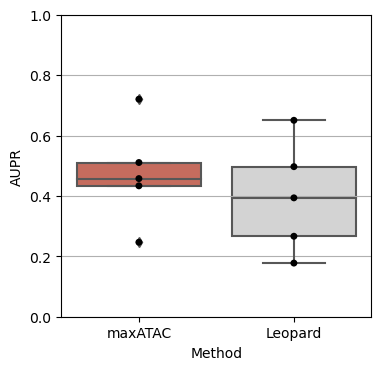

In [89]:
plt.figure(figsize=(4,4), dpi=100)

sns.boxplot(data=plot_df, x="Method", y="AUPR", zorder=2, palette=["#d6604d", "lightgrey"])
sns.swarmplot(data=plot_df, x="Method", y="AUPR", color="k", zorder=4)

plt.grid(axis="y", zorder=0)

plt.ylim(0,1)

plt.savefig("/Users/caz3so/scratch/20220915_maxatac_reviews/Leopard/benchmark/20221028_maxatac_leopard_AUPR_boxplot.jpeg")

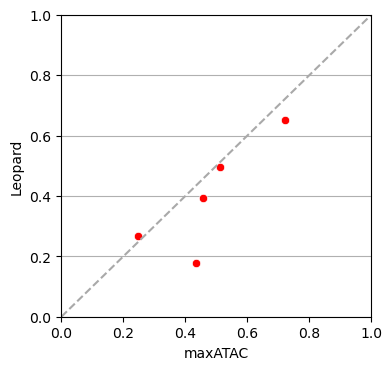

In [97]:
plt.figure(figsize=(4,4), dpi=100)

sns.scatterplot(data=aupr_df, x="maxATAC", y="Leopard", zorder=2, color="red")

plt.plot([0,1], [0,1], color="darkgrey", ls="--")

plt.grid(axis="y", zorder=0)

plt.ylim(0,1)
plt.xlim(0,1)
plt.savefig("/Users/caz3so/scratch/20220915_maxatac_reviews/Leopard/benchmark/20221028_maxatac_leopard_AUPR_scatterplotplot.jpeg")

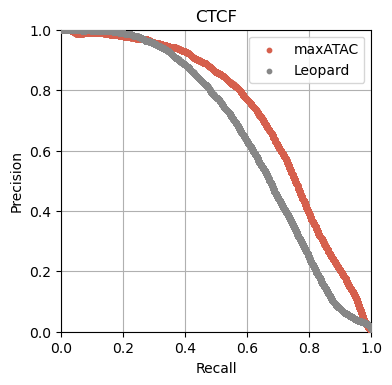

In [46]:
plt.figure(figsize=(4,4), dpi=100)

plt.scatter(x=df_max["Recall"], y=df_max["Precision"], zorder=9, c="#d6604d", s=10)
plt.scatter(x=df_leopard["Recall"], y=df_leopard["Precision"], zorder=10, c="#878787", s=10)

plt.grid(zorder=0)

plt.title("CTCF")

plt.ylabel("Precision")
plt.xlabel("Recall")

plt.ylim(0,1)
plt.xlim(0,1)

plt.legend(["maxATAC", "Leopard"])